In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from sklearn.model_selection import train_test_split
import tqdm as notebook_tqdm
from transformers import pipeline


/workspaces/Rreview_Analyzer/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/cleaned_data.csv')

#### Data Preprocessing

Text(0.5, 1.0, 'Review Length Distribution')

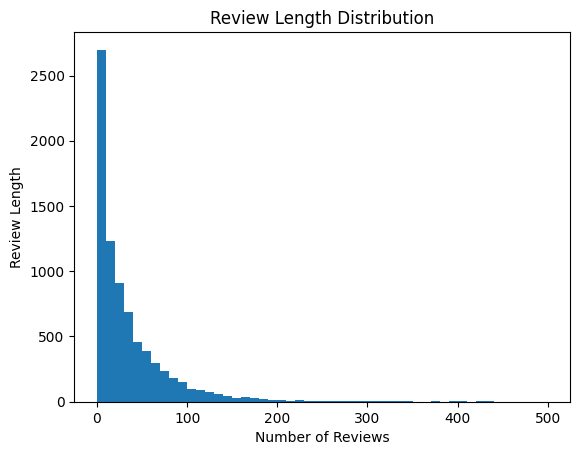

In [89]:
df['reviewText'].str.split().str.len().plot(kind='hist', bins=50, range=(0, 500))
plt.xlabel('Number of Reviews')
plt.ylabel('Review Length')
plt.title('Review Length Distribution')

In [3]:
# Check the maximum word count
max_word_count = df['reviewText'].str.split().str.len().max()
print(f"Maximum word count: {max_word_count}")

# Check distribution at higher thresholds
for threshold in [50, 100, 500, 1000, 2000, 3000]:
    count = (df['reviewText'].str.split().str.len() > threshold).sum()
    print(f"Reviews with more than {threshold} words: {count}")

Maximum word count: 3695
Reviews with more than 50 words: 1825
Reviews with more than 100 words: 613
Reviews with more than 500 words: 6
Reviews with more than 1000 words: 1
Reviews with more than 2000 words: 1
Reviews with more than 3000 words: 1


In [4]:
# Set word count threshold
threshold = 100  # Adjust as needed

# Original size before filtering
original_size = len(df)

# Create a boolean mask for reviews below the threshold
mask = df['reviewText'].str.split().str.len() <= threshold

# Apply the mask to filter the DataFrame
df = df[mask]

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

# Check the new size
new_size = len(df)

print(f"Original data size: {original_size}")
print(f"New data size: {new_size}")
print(f"Total of {original_size - new_size} reviews were deleted")

Original data size: 7857
New data size: 7244
Total of 613 reviews were deleted


In [5]:
# Regex cleaning
def remove_punctuation (text):
  return re.sub(r'[^\w\s]','',text)

def remove_url (text):
  return re.sub('http.*', '',text)

def remove_double_white_space (text):
  return re.sub(r'\s\s', ' ',text)

def remove_new_lines (text):
  return re.sub(r'\n\n', ' ',text)

def remove_hashtags (text):
  return re.sub(r'#\w*', '',text)

def remove_usernames (text):
  return re.sub(r'@\w*', '',text)

def remove_single_char(text):
  return re.sub(' . ',' ',text) 

def lower_clean(text):
  text = remove_punctuation(text)
  text = remove_url(text)
  text = remove_hashtags(text)
  text = remove_new_lines(text)
  text = remove_usernames(text)
  text = remove_single_char(text)
  text = remove_double_white_space(text)
  return text.strip()

In [6]:
# Apply the function to the filtered data
df['reviewText'] = df['reviewText'].apply(lambda x: lower_clean(x))

#### Label Data

In [19]:
from transformers import pipeline

# Load the classification pipeline with the specified model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Classify a new sentence
sentence = "this product is ok"
result = pipe(sentence)

# Print the result
print(result)


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


[{'label': 'POS', 'score': 0.8931066989898682}]


In [120]:
sentiment_pipeline = pipeline("sentiment-analysis", model="tabularisai/multilingual-sentiment-analysis")
label = sentiment_pipeline("this product is ok")[0]["label"]
score = sentiment_pipeline("this product is ok")[0]["score"]

label, score

Device set to use cpu


('Neutral', 0.5378968119621277)

In [122]:
df_test = df.copy() 

# Load a sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="tabularisai/multilingual-sentiment-analysis")



# Apply to your dataset
df_test["predicted_sentiment"] = df_test['reviewText'][:30].apply(lambda x: sentiment_pipeline(x)[0]["label"])

df_test.head()


Device set to use cpu


,index,authorName,googleMapsPlaceId,placeAddress,placeName,placeUrl,provider,reviewDate,reviewRating,reviewText,...,reviewImages/4,reviewImages/5,reviewImages/6,reviewImages/7,reviewImages/8,reviewImages/9,reviewImages/10,reviewImages/11,reviewImages/12,predicted_sentiment
0,1,Lindsey L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2022-02-21,5.0,This is the best vegan breakfast Ive had on do...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Positive
1,2,Mara R,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-12-19,5.0,The Romey Sandwich is my repeat order its so g...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
2,3,Yvette Y,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-10-13,1.0,The Orchard CThe Orchard Cobb Salad Salad was ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Negative
3,4,Hugh M,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-07-22,5.0,The Bowery Sandwich was great Delicious and he...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Positive
4,5,Erin L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-11,5.0,edith is the best sandwich ive ever put in my ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Positive


In [148]:
df_test["predicted_sentiment"].unique()

array(['Very Positive', 'Neutral', 'Very Negative', 'Negative',
       'Positive', nan], dtype=object)

In [152]:
t1 = df_test[df_test['index'] == 22]
t1[['reviewRating', 'predicted_sentiment', 'reviewText']]

,reviewRating,predicted_sentiment,reviewText
21,5.0,Neutral,My usual order is the plain burger fries Both ...


In [153]:
t1['reviewText'].to_string()

'21    My usual order is the plain burger fries Both ...'

In [149]:
df_test[df_test['predicted_sentiment'] == 'Neutral']

,index,authorName,googleMapsPlaceId,placeAddress,placeName,placeUrl,provider,reviewDate,reviewRating,reviewText,...,reviewImages/4,reviewImages/5,reviewImages/6,reviewImages/7,reviewImages/8,reviewImages/9,reviewImages/10,reviewImages/11,reviewImages/12,predicted_sentiment
1,2,Mara R,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-12-19,5.0,The Romey Sandwich is my repeat order its so g...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
16,17,Melanie M,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2025-02-04,5.0,ALWAYS THE BEST HANDS DOWN Cookies Cream Milks...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
21,22,Victoria L,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2022-05-28,5.0,My usual order is the plain burger fries Both ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
24,25,Travis W,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2022-01-23,5.0,First time ordered thought it was okay too muc...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral


#### Split Data

##### Tokenize the data using DistilBERT tokenizer -> Tokenization

#### Create a dataset class -> Convert data to Hugging Face Dataset format

#### Fine-tune DistilBERT for sentiment analysis

#### Train the Model

#### Model Evaluation

#### Save & Load the Model for Future Use